# Notebook for first EDA Project "House Prices in King County"

In [361]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.api as sms ##??

%matplotlib inline



# First Look into the Data

## Variable Overview

| Variable | Definition                                 | Key                                            | Type        |
|:----------|:--------------------------------------------|:------------------------------------------------|-------------|
| id | unique identified for a house                    |                                           | ordnial     |
| date       | house was sold                           |                                                | interval     |
| price     |      house price - to predict             |                                                | intervaal |
| bedrooms  | number of Bedrooms/House                  |                                                | ratio       |
| bathrooms | number of bathrooms/bedrooms              |                                                | ratio       |
| sqft_living   |       footage of the home             |                                                | ratio         |
| sqft_lot   |     footage of the lot                   |                                                | ratio     |
| floors    |   total floors (levels) in house          |                                                | ratio       |
|waterfront | object with waterfront view  |                                                | nominal     |
| view      |   object has been viewed                   |                                                |nominal |
|condition  |  how good the condition is ( Overall )    |                                                | ordinal  
| grade     |  overall grade given to the housing unit, based on King County grading system  |                                                | ordinal  
| sqft_above  | square footage of house apart from basement   |                                                | ratio  
| sqft_basement  | square footage of the basement        |                                                | ratio  
| yr_built  |    year the object was built                            |                                                | interval 
| yr_renovated  |  year when the object was renovated         |                                                | interval 
| zipcode  |      zip code                              |                                                | ordinal 
| lat      |    latitude coordinate                     |                                                | ratio 
| long     |    longitude coordinate                    |                                                | ratio 
| sqft_living15  |  square footage of interior housing living space for the nearest 15 neighbors   |                         | ratio 
| sqft_lot15  | square footage of the land lots of the nearest 15 neighbors |                                                | ratio 

## Import the data into a pandas dataframe

In [429]:
hp = pd.read_csv('King_County_House_prices_dataset.csv')
hp

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014   221900.0         3       1.00         1180   
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
2      5631500400   2/25/2015   180000.0         2       1.00          770   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
7      2008000270   1/15/2015   291850.0         3       1.50         1060   
8      2414600126   4/15/2015   229500.0         3       1.00         1780   
9      3793500160   3/12/2015   323000.0         3       2.50         1890   
10     1736800520    4/3/2015   662500.0         3       2.50         3560   
11     9212900260   5/27/2014   468000.0         2       1.00         1160   
12      114101516   5/28/2014   310000.0         3       1.00         1430   
13     6054650070   10/7/2014   400000.0         3       1.75         1370   
14     1175000570   3/12/2015   530000.0         5       2.00         1810   
15     9297300055   1/24/2015   650000.0         4       3.00         2950   
16     1875500060   7/31/2014   395000.0         3       2.00         1890   
17     6865200140   5/29/2014   485000.0         4       1.00         1600   
18       16000397   12/5/2014   189000.0         2       1.00         1200   
19     7983200060   4/24/2015   230000.0         3       1.00         1250   
20     6300500875   5/14/2014   385000.0         4       1.75         1620   
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
22     7137970340    7/3/2014   285000.0         5       2.50         2270   
23     8091400200   5/16/2014   252700.0         2       1.50         1070   
24     3814700200  11/20/2014   329000.0         3       2.25         2450   
25     1202000200   11/3/2014   233000.0         3       2.00         1710   
26     1794500383   6/26/2014   937000.0         3       1.75         2450   
27     3303700376   12/1/2014   667000.0         3       1.00         1400   
28     5101402488   6/24/2014   438000.0         3       1.75         1520   
29     1873100390    3/2/2015   719000.0         4       2.50         2570   
...           ...         ...        ...       ...        ...          ...   
21567  2025049203   6/10/2014   399950.0         2       1.00          710   
21568   952006823   12/2/2014   380000.0         3       2.50         1260   
21569  3832050760   8/28/2014   270000.0         3       2.50         1870   
21570  2767604724  10/15/2014   505000.0         2       2.50         1430   
21571  6632300207    3/5/2015   385000.0         3       2.50         1520   
21572  2767600688  11/13/2014   414500.0         2       1.50         1210   
21573  7570050450   9/10/2014   347500.0         3       2.50         2540   
21574  7430200100   5/14/2014  1220000.0         4       3.50         4910   
21575  4140940150   10/2/2014   572000.0         4       2.75         2770   
21576  1931300412   4/16/2015   475000.0         3       2.25         1190   
21577  8672200110   3/17/2015  1090000.0         5       3.75         4170   
21578  5087900040  10/17/2014   350000.0         4       2.75         2500   
21579  1972201967  10/31/2014   520000.0         2       2.25         1530   
21580  7502800100   8/13/2014   679950.0         5       2.75         3600   
21581   191100405   4/21/2015  1580000.0         4       3.25         3410   
21582  8956200760  10/13/2014   541800.0         4       2.50         3118   
21583  7202300110   9/15/2014   810000.0         4       3.00         3990   
21584   249000205  10/15/2014  1540000.0         5       3.75         4470   
21585  5100403806    4/7/2015   467000.0         3       2.50         1425   
21586   844000965   6/26/2014   22400

## Get a basic overview over the data

In [363]:
print("Number of rows and coloumns in the House Pricing data set: ", hp.shape)

Number of rows and coloumns in the House Pricing data set:  (21597, 21)


In [364]:
hp.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [365]:
hp.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

In [366]:
hp.sample(10) #get a random sample from inbetween

id        date      price  bedrooms  bathrooms  sqft_living  \
5816   1934800086  11/20/2014   435000.0         2       2.50         1560   
11420  7856601040   2/20/2015   745000.0         4       1.75         1990   
4962   8678500020  12/13/2014  1580000.0         4       3.50         5830   
14780  3295710150  10/15/2014   270000.0         3       2.50         1660   
9529   5608010750   8/29/2014  1160000.0         4       3.50         4190   
9584   3537900180  10/20/2014   700000.0         2       1.00         1300   
10111   626059276   5/30/2014   458000.0         5       2.50         3090   
17468  7387500235   5/15/2014   340000.0         3       1.75         1960   
1672   9550202010   7/10/2014   775000.0         6       2.75         2980   
11150  6804600260    6/3/2014   420000.0         3       1.75         1660   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
5816       1222     2.0         0.0   0.0  ...      8        1080   
11420      8900     1.0         0.0   0.0  ...      8        1990   
4962     131116     2.0         0.0   0.0  ...     11        5830   
14780      5550     2.0         0.0   0.0  ...      7        1660   
9529      15724     2.0         0.0   2.0  ...     11        4190   
9584      12000     1.0         0.0   0.0  ...      8        1300   
10111     23265     1.0         0.0   0.0  ...      8        2990   
17468      8136     1.0         0.0   0.0  ...      7         980   
1672       5000     1.5         0.0   0.0  ...      7        2480   
11150      9600     1.0         0.0   0.0  ...      8        1380   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
5816           480.0     2008           NaN    98122  47.6040 -122.307   
11420            0.0     1972           0.0    98006  47.5639 -122.149   
4962             0.0     2005           0.0    98024  47.5986 -121.949   
14780            0.0     2002           0.0    98198  47.3750 -122.304   
9529             0.0     1994           0.0    98027  47.5518 -122.096   
9584             0.0     1959           0.0    98004  47.6366 -122.229   
10111          100.0     1957           0.0    98011  47.7709 -122.212   
17468          980.0     1948           0.0    98106  47.5208 -122.364   
1672           500.0     1916           NaN    98103  47.6684 -122.331   
11150              ?     1981           0.0    98011  47.7601 -122.167   

       sqft_living15  sqft_lot15  
5816            1560        2081  
11420           2620        8925  
4962            5340      207206  
14780           1810        5550  
9529            3300       10113  
9584            2420       15000  
10111           2560       18773  
17468           1070        7480  
1672            1470        5000  
11150           2030        9500  

[10 rows x 21 columns]

In [431]:
hp.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

## Type of Data and Missing Values

In [367]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [452]:
#hp.sqft_basement.astype(dtype=float)
hp['sqft_basement'] = pd.to_numeric(hp['sqft_basement'],errors='coerce')
hp.sqft_basement

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6           NaN
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18          NaN
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581       NaN
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

## Basic Statistics 

In [377]:
hp.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      3.409825   
std    4.141264e+04      0.539683      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# Missing Values

In [369]:
hp.isnull().sum() #im folgenden namen des datensatzes ändern, damit man die fehlenden werte noch sieht

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [370]:
missing = pd.DataFrame(hp.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/hp.shape[0]*100,1)
missing[missing.Number!=0]


Number  Percentage
waterfront       2376        11.0
view               63         0.3
sqft_basement     454         2.1
yr_renovated     3842        17.8

There are **2376 missing values** in *waterfront* and **3842 missin values** for the *renovation year* and **63 missing values** for *houseview*.

+ **waterfront** has 11 percent missing values
+ **view** has 0.3 percent missing values
+ **yr_renovated** has 17.8 percent missing values

In [371]:
hp.waterfront.nunique()

2

In [372]:
hp.waterfront.unique()

array([nan,  0.,  1.])

We can't ignore the waterfront variable since a lake view is considered a positive living aspect and might influence the house price. We cannot ignore the renovation year either, since this might indicate a higher value in old housings as well. 

In [373]:
hp.condition.unique()

array([3, 5, 4, 1, 2])

In [374]:
type(hp.sqft_basement)

pandas.core.series.Series

Inserting the mode for null-values:

In [375]:
hp['waterfront'] = hp['waterfront'].fillna(hp['waterfront'].mode()[0])
hp['view'] = hp['view'].fillna(hp['view'].mode()[0])
hp['yr_renovated'] = hp['yr_renovated'].fillna(hp['yr_renovated'].mode()[0])
hp['sqft_basement'] = hp['sqft_basement'].fillna(hp['sqft_basement'].mode()[0])

In [376]:
hp.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Feature Engineering

In [453]:
type(hp.sqft_basement[1])

numpy.float64

In [455]:
#built sqft_total_property =

hp['sqft_total_property'] = hp['sqft_living']+ hp['sqft_lot'] + hp['sqft_basement']
hp.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...        1180            0.0   
1      7242     2.0         0.0   0.0  ...        2170          400.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   

   sqft_lot15  sqft_total_property  
0        5650               6830.0  
1        7639              10212.0  

[2 rows x 22 columns]

# Visual Exploration

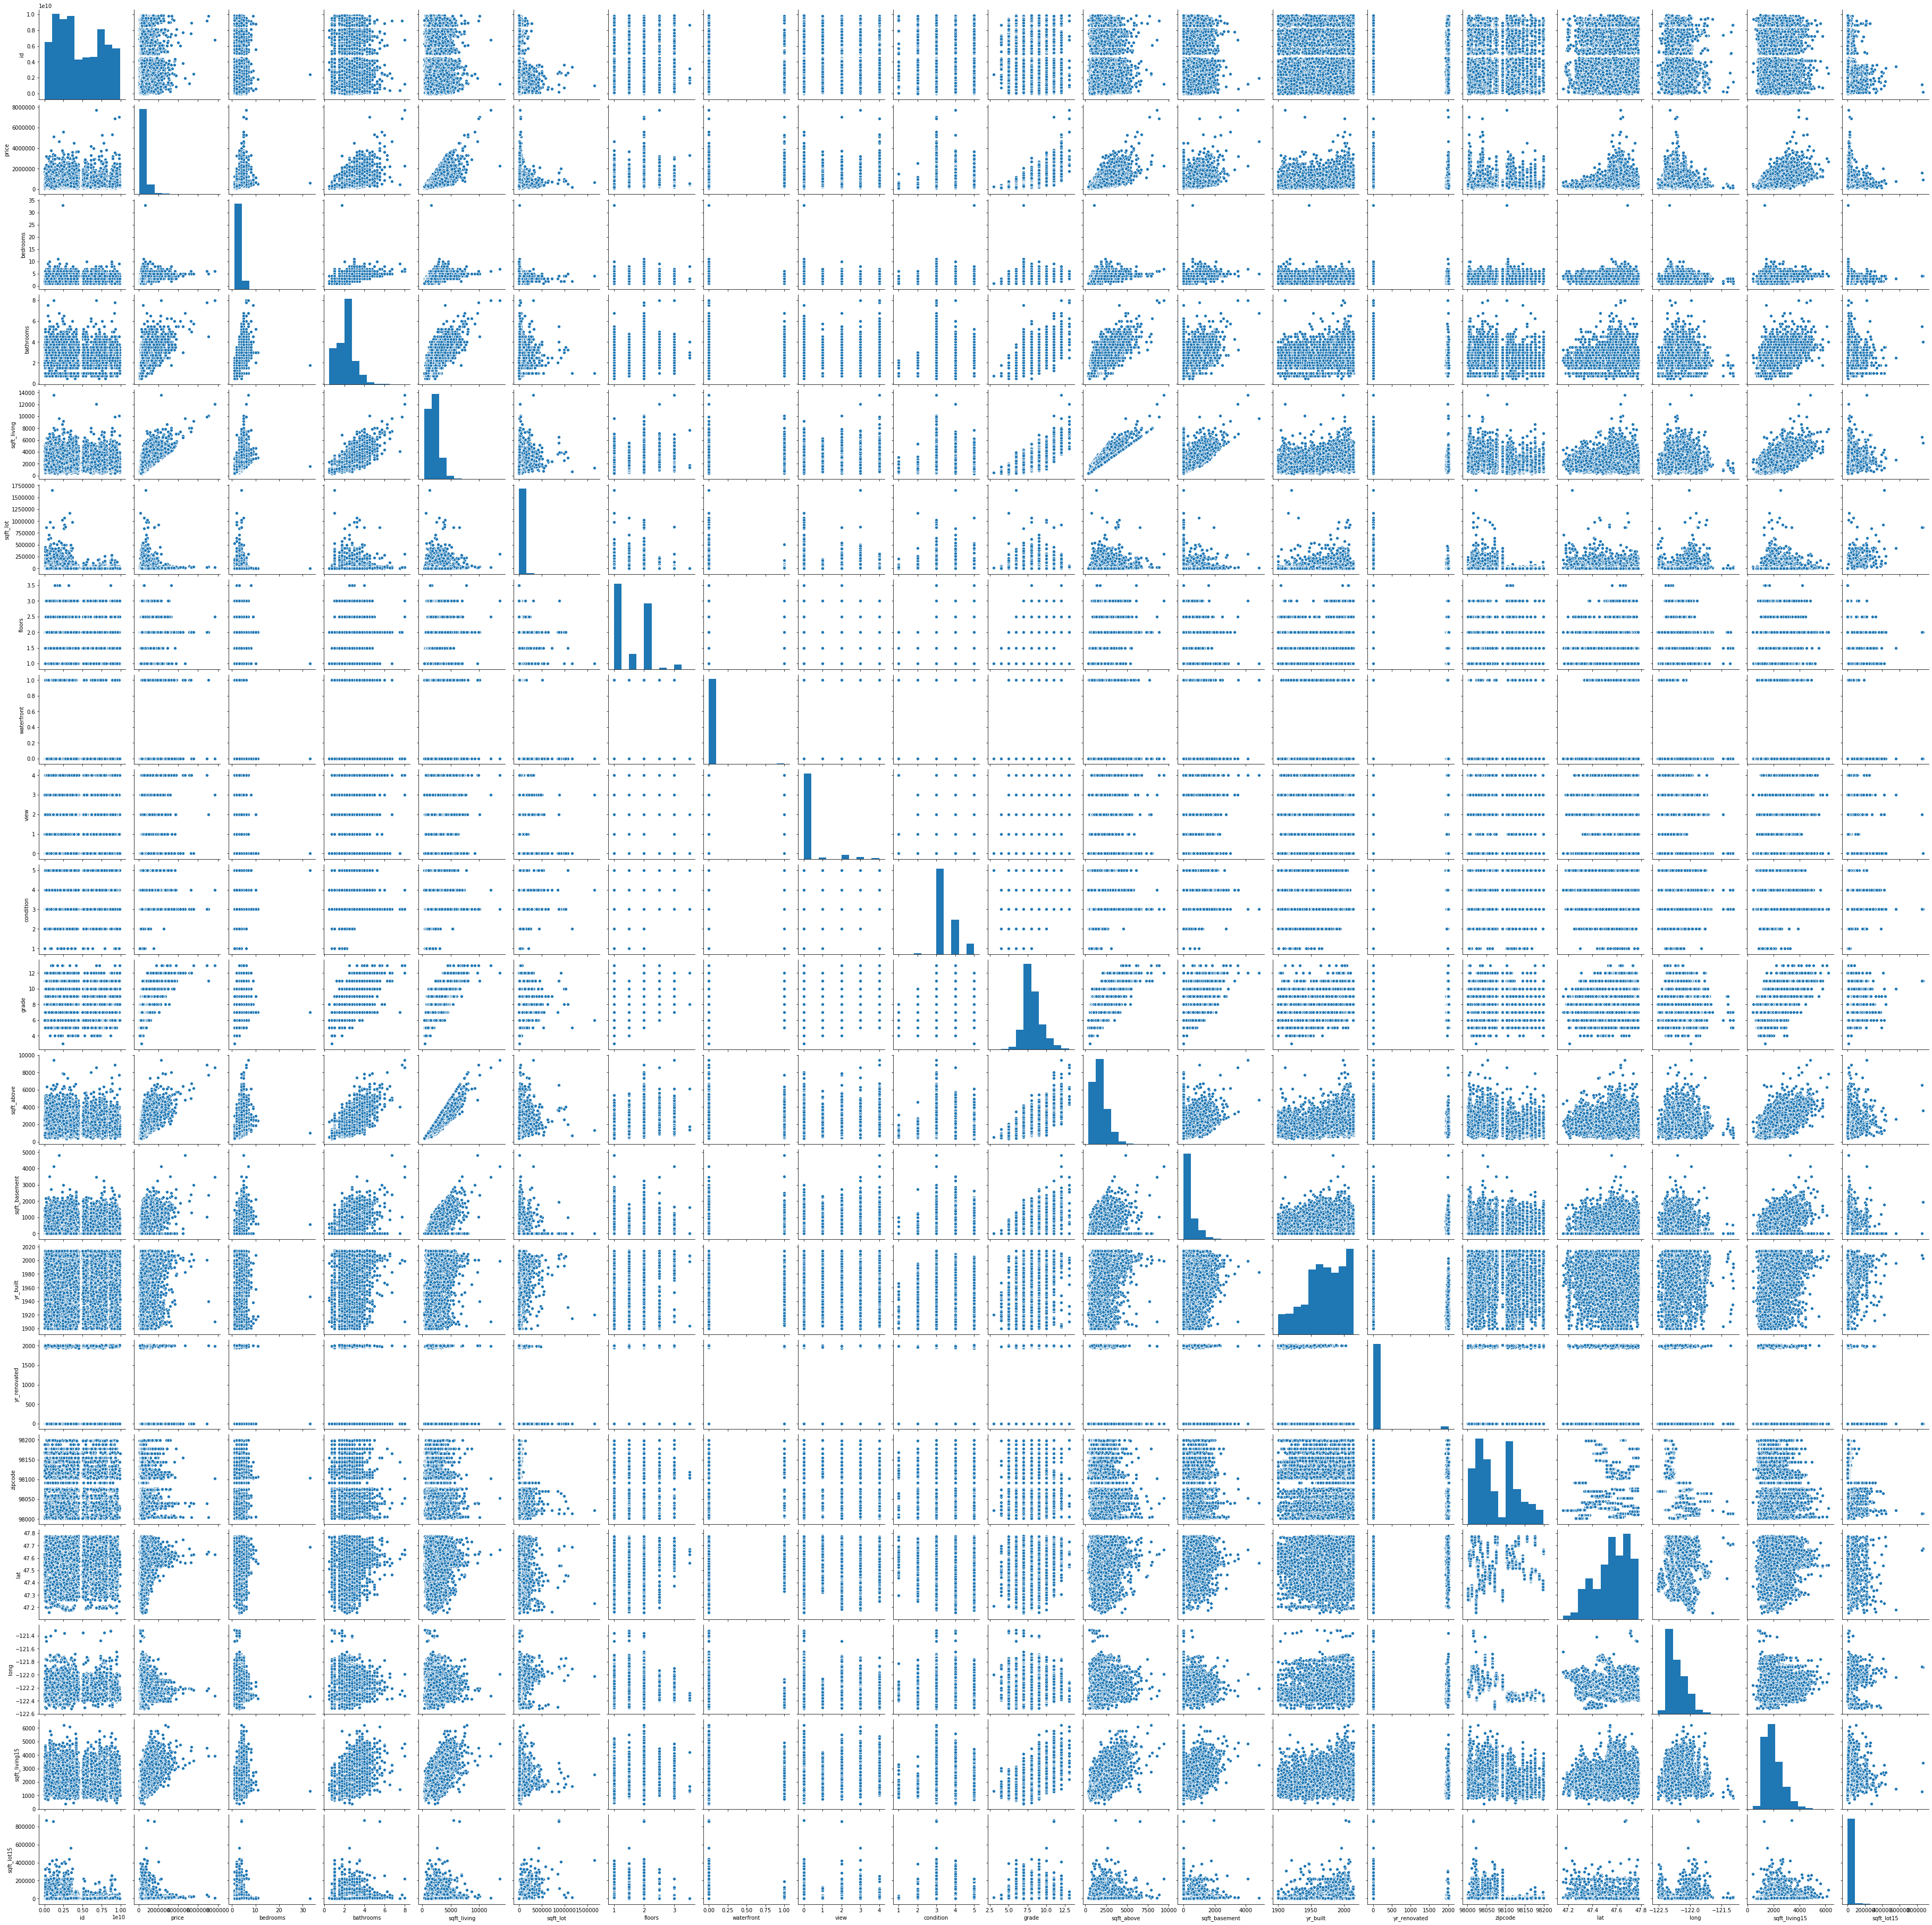

In [378]:
sns.pairplot(hp);
plt.savefig('figures/pairplot.png')

Pairplotting is of little use in this case.

## Heatmap

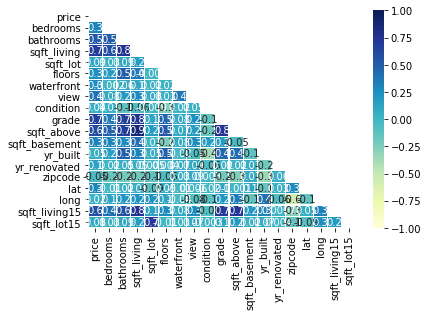

In [379]:
del(hp['id'])
matrix = np.triu(hp.corr())
sns.heatmap(hp.corr(),
           mask=matrix,
           annot = True,
           fmt = '.1g',
           vmin=-1, 
           vmax=1, 
           center= 0,
           cmap= 'YlGnBu',
           linewidth=.1
           );


ax.set_ylim((0,70))



plt.savefig('figures/correlogram.png')


## Correlation Matrix

In [380]:
corr_matrix = hp.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

In [381]:
corr_matrix['grade'].sort_values(ascending=False)

grade            1.000000
sqft_living      0.762779
sqft_above       0.756073
sqft_living15    0.713867
price            0.667951
bathrooms        0.665838
floors           0.458794
yr_built         0.447865
bedrooms         0.356563
view             0.249082
long             0.200341
sqft_basement    0.165843
sqft_lot15       0.120981
sqft_lot         0.114731
lat              0.113575
waterfront       0.082818
yr_renovated     0.015623
condition       -0.146896
zipcode         -0.185771
Name: grade, dtype: float64

## Histograms

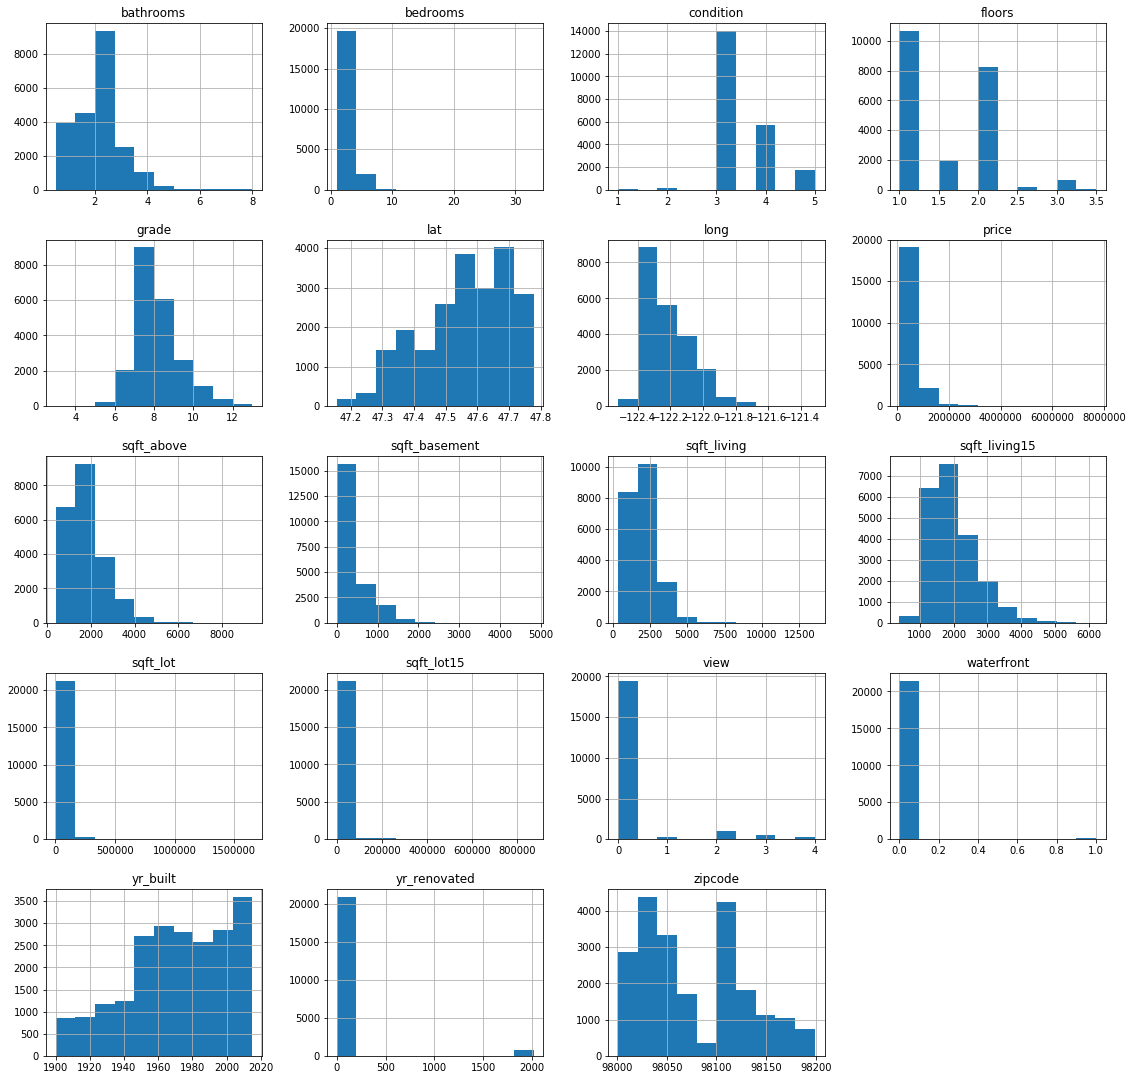

In [382]:
_ = hp.hist(figsize=(19,19))
plt.savefig('figures/hist_all.png')

The amoung of houses with a waterfront view is very low. The same goes for houses that have been renovated. Consequently, we might use the mode for the missing values. 

In [383]:
#replace missing values --> identifying categorical variables (notebook7)

## Scatterplots of the highest correlations

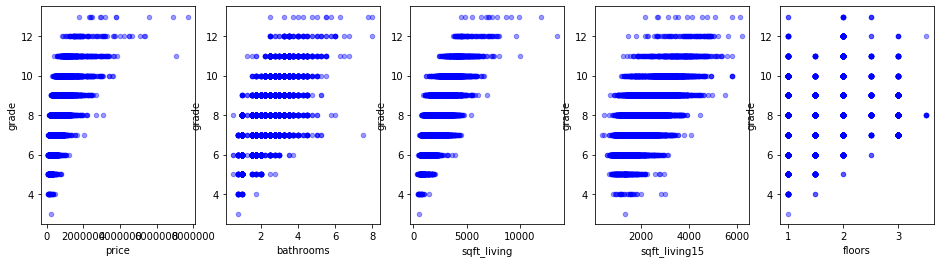

In [384]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

for xcol, ax in zip(
    ['price', 'bathrooms', 'sqft_living', 'sqft_living15', 'floors'], axes):
    hp.plot(kind='scatter', x=xcol, y='grade', ax=ax, alpha=0.4, color='b')

In [385]:
#there are high quality houses that cost as much as some low quality houses. so what defines the price then?

In [386]:
hp[['bathrooms', 'floors']].nunique()

bathrooms    29
floors        6
dtype: int64

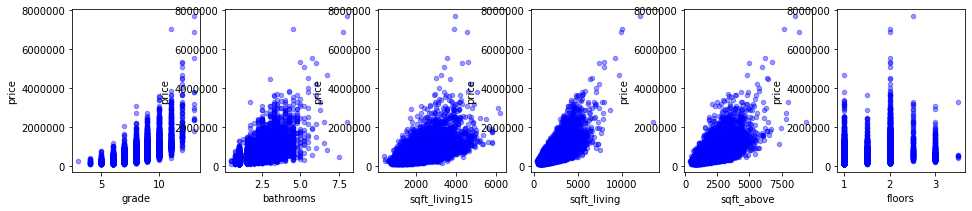

In [387]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 3))

for xcol, ax in zip([
        'grade', 'bathrooms', 'sqft_living15', 'sqft_living', 'sqft_above',
        'floors'], axes):
    hp.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [388]:
hp[['grade', 'floors']].nunique()

grade     11
floors     6
dtype: int64

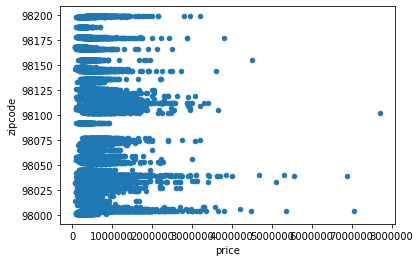

In [389]:
hp.plot(x='price', y='zipcode', kind='scatter')

## Boxplots

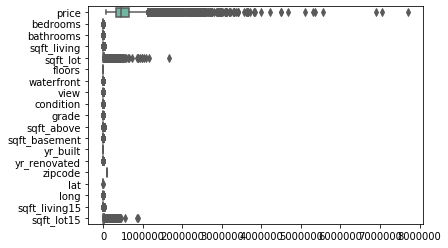

In [390]:
sns.boxplot(data=hp, orient='h', palette='Set2'); 

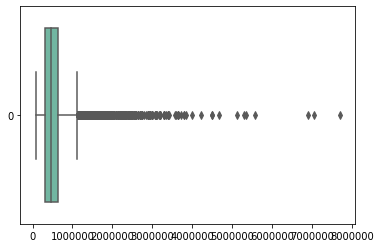

In [391]:
sns.boxplot(data=hp.price, orient='h', palette='Set2');

# Transforming Categorical Variables

In [392]:
#siehe notebook7 - aber welche? grade ist ja schon numerisch und ordinal, am ehesten noch Zipcode

In [393]:
type(hp.zipcode[1])

numpy.int64

In [394]:
cat_zipcode = hp.zipcode.astype('category')
cat_zipcode.head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: category
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]

In [395]:
lb_make = LabelEncoder()

zipcode_encoded = lb_make.fit_transform(cat_zipcode)
zipcode_encoded

array([66, 55, 16, ..., 59, 15, 59])

In [396]:
#cat_zipcode.cat.codes

In [397]:
hp['zipcode_encoded'] = zipcode_encoded
hp.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0          3  ...        1180            0.0      1955   
1         0.0   0.0          3  ...        2170          400.0      1951   
2         0.0   0.0          3  ...         770            0.0      1933   
3         0.0   0.0          5  ...        1050          910.0      1965   
4         0.0   0.0          3  ...        1680            0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   
2           0.0    98028  47.7379 -122.233           2720        8062   
3           0.0    98136  47.5208 -122.393           1360        5000   
4           0.0    98074  47.6168 -122.045           1800        7503   

   zipcode_encoded  
0               66  
1               55  
2               16  
3               58  
4               37  

[5 rows x 21 columns]

In [398]:
type(hp.view[1])

numpy.float64

In [399]:
cat_view = hp.view.astype('category')
cat_view.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: view, dtype: category
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]

In [400]:
lb_make = LabelEncoder()

view_encoded = lb_make.fit_transform(cat_view)
view_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [401]:
hp['view_encoded'] = view_encoded
hp.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0         0.0   0.0          3  ...            0.0      1955           0.0   
1         0.0   0.0          3  ...          400.0      1951        1991.0   
2         0.0   0.0          3  ...            0.0      1933           0.0   
3         0.0   0.0          5  ...          910.0      1965           0.0   
4         0.0   0.0          3  ...            0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  zipcode_encoded  \
0    98178  47.5112 -122.257           1340        5650               66   
1    98125  47.7210 -122.319           1690        7639               55   
2    98028  47.7379 -122.233           2720        8062               16   
3    98136  47.5208 -122.393           1360        5000               58   
4    98074  47.6168 -122.045           1800        7503               37   

   view_encoded  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 22 columns]

# Split Data and Selected Features

Predictor and target split. Furthermore we drope date since we are getting a ValueError repeatedly:

In [402]:
X = hp.drop(['price', 'date'], axis = 1) #fix this 
y = hp['price']

Split the data set:

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

Linear regression doesn't work on date data. 
Thus, we need to convert it into numerical value:

In [404]:
#import datetime as dt
#X['date'] = pd.to_datetime(X['date'])
#X['date']= X['date'].map(dt.datetime.toordinal)

The following code returns only the selected features with p_values < 0.05 for the target variable 'price':

In [405]:
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train, X1)

lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features) > 0):
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=selected_features)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break
print('The selected features for "price" are: ', selected_features)

The selected features for "price" are:  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zipcode_encoded', 'view_encoded']


/Users/student/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Return selected features for grades:

In [406]:
X = hp.drop(['grade', 'date'], axis = 1)
y = hp['grade']

In [407]:
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train, X1)

lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features) > 0):
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=selected_features)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break
print('The selected features for "grade" are: ', selected_features)

The selected features for "grade" are:  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_encoded']


# Linear Modelling

## LM of 'price' wiht selected features

In [420]:
X4 = hp[[
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
    'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
    'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]]
X4 = sm.add_constant(X4)
y4 = hp.price

X4.head(n=2)

const  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0    1.0         3       1.00         1180      5650     1.0         0.0   
1    1.0         3       2.25         2570      7242     2.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7        1180            0.0      1955           0.0   
1   0.0          3      7        2170          400.0      1951        1991.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639

## LM of  'grade' with selected features

Im curious. What does the grading system do? How is it related to the evaluated variables?

In [409]:
X = hp[[
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'sqft_above', 'yr_built', 'yr_renovated', 'lat',
    'long', 'sqft_living15', 'sqft_lot15'
]]
X = sm.add_constant(X)
y = hp.grade

X.head(n=2)

const     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    1.0  221900.0         3       1.00         1180      5650     1.0   
1    1.0  538000.0         3       2.25         2570      7242     2.0   

   waterfront  view  sqft_above  yr_built  yr_renovated      lat     long  \
0         0.0   0.0        1180      1955           0.0  47.5112 -122.257   
1         0.0   0.0        2170      1951        1991.0  47.7210 -122.319   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639

In [421]:
sm.OLS(y4, X4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2798.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:25:05   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.656e+06   2.93e+06      2.271      0.023    9.12e+05    1.24e+07
bedrooms      -3.589e+04   1900.636    -18.882      0.000   -3.96e+04   -3.22e+04
bathrooms      4.162e+04   3262.735     12.755      0.000    3.52e+04     4.8e+04
sqft_living     102.8320     18.076      5.689      0.000      67.401     138.263
sqft_lot          0.1281      0.048      2.673      0.008       0.034       0.222
floors         7000.6499   3600.684      1.944      0.052     -56.956    1.41e+04
waterfront     6.181e+05   1.81e+04     34.082      0.000    5.83e+05    6.54e+05
view           5.329e+04   2122.073     25.111      0.000    4.91e+04    5.74e+04
condition      2.685e+04   2346.458     11.443      0.000    2.23e+04    3.15e+04
grade          9.691e+04   2160.604     44.853      0.000    9.27e+04    1.01e+05
sqft_above       78.0057     18.067      4.318      0.000      42.593     113.419
sqft_basement    47.6352     17.907      2.660      0.008      12.537      82.734
yr_built      -2637.5367     71.932    -36.667      0.000   -2778.528   -2496.545
yr_renovated     23.5856      3.977      5.930      0.000      15.790      31.381
zipcode        -584.4582     32.991    -17.716      0.000    -649.122    -519.794
lat            6.007e+05   1.07e+04     55.939      0.000     5.8e+05    6.22e+05
long          -2.177e+05   1.32e+04    -16.546      0.000   -2.43e+05   -1.92e+05
sqft_living15    21.5139      3.451      6.235      0.000      14.751      28.277
sqft_lot15       -0.3877      0.073     -5.285      0.000      -0.531      -0.244
==============================================================================
Omnibus:                    18343.380   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1833646.592
Skew:                           3.563   Prob(JB):                         0.00
Kurtosis:                      47.575   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [410]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     3948.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:25:04   Log-Likelihood:                -19838.
No. Observations:               21597   AIC:                         3.971e+04
Df Residuals:                   21581   BIC:                         3.984e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -106.6624      4.746    -22.475      0.000    -115.965     -97.360
price          8.788e-07   1.94e-08     45.353      0.000    8.41e-07    9.17e-07
bedrooms         -0.0754      0.006    -13.145      0.000      -0.087      -0.064
bathrooms         0.0712      0.010      7.237      0.000       0.052       0.091
sqft_living       0.0002   1.35e-05     16.274      0.000       0.000       0.000
sqft_lot       2.896e-07   1.44e-07      2.005      0.045    6.52e-09    5.73e-07
floors            0.1316      0.011     12.253      0.000       0.111       0.153
waterfront       -0.6900      0.056    -12.343      0.000      -0.800      -0.580
view              0.0266      0.006      4.120      0.000       0.014       0.039
sqft_above        0.0002    1.3e-05     17.985      0.000       0.000       0.000
yr_built          0.0091      0.000     44.839      0.000       0.009       0.010
yr_renovated   3.754e-05   1.18e-05      3.169      0.002    1.43e-05    6.07e-05
lat               0.2205      0.033      6.613      0.000       0.155       0.286
long             -0.6844      0.036    -19.195      0.000      -0.754      -0.615
sqft_living15     0.0004      1e-05     40.003      0.000       0.000       0.000
sqft_lot15    -4.407e-07   2.21e-07     -1.993      0.046   -8.74e-07   -7.33e-09
==============================================================================
Omnibus:                     1076.036   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3295.332
Skew:                          -0.206   Prob(JB):                         0.00
Kurtosis:                       4.869   Cond. No.                     7.52e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Among the data, the King County grading system is strongly associated with the numbers of floors, bathrooms, squarefeet of living space, the squarfeet of living space in the closest 15 neighbors, as well as with the year the hous was built.

This regression has a R squared below 0.7 . It does not change by removing independent variables. 

On  *https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r* it says:

*BUILDING GRADE*
- Represents the construction quality of improvements. 
- Grades run from grade 1 to 13. Generally defined as:

**1-3** Falls short of minimum building standards. Normally cabin or inferior structure.

**4** Generally older, low quality construction. Does not meet code.

**5** Low construction costs and workmanship. **Small**, simple design.

**6** Lowest grade currently meeting building code. Low quality materials and simple designs.

**7** **Average grade of construction** and design. Commonly seen in plats and **older** sub-divisions.

**8** Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

**9** **Better architectural** design with extra interior and exterior design and quality.

**10** Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a **larger square footage**.

**11** Custom design and higher quality finish work with added amenities of solid woods, **bathroom fixtures and more luxurious options**.

**12** **Custom design and excellent builders**. All materials are of the highest quality and all conveniences are present.

**13** Generally custom designed and built. **Mansion level**. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

## SLM of 'price' and 'zipcode_encoded'

In [411]:
# AcceptableRsquaredvalues=0.7to0.9
# price + highest corr with and withoug grade --> multiple regression (notebook 4)


Judging by the heatmap King County house prices are not influenced by zipcode. This goes against common experience in the field, so let's test it. 

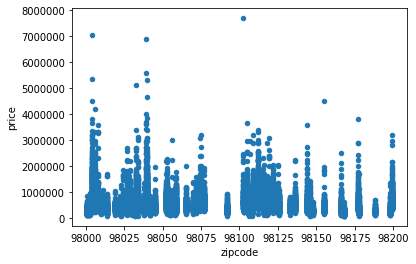

In [412]:
hp.plot(x='zipcode', y='price', kind='scatter');

In [414]:
X2 = hp[['zipcode']]
X2 = sms.add_constant(X2)
X2.head()

const  zipcode
0    1.0    98178
1    1.0    98125
2    1.0    98028
3    1.0    98136
4    1.0    98074

In [415]:
y2 = hp[['price']]
y2.head()

price
0  221900.0
1  538000.0
2  180000.0
3  604000.0
4  510000.0

In [416]:
model = sms.OLS(y2, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           4.06e-15
Time:                        18:25:04   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.65e+07   4.58e+06      7.977      0.000    2.75e+07    4.55e+07
zipcode     -366.6086     46.649     -7.859      0.000    -458.045    -275.173
==============================================================================
Omnibus:                    19044.296   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123391.740
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      37.413   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Although the diffrence is statistically significant, zipcode explains very little variance of the house prices.

## SLM of 'price' and 'grade'

In [417]:
X3 = hp[['price']]
X3 = sms.add_constant(X3)
X3.head()

const     price
0    1.0  221900.0
1    1.0  538000.0
2    1.0  180000.0
3    1.0  604000.0
4    1.0  510000.0

In [418]:
y3 = hp[['grade']]
y3.head()

grade
0      7
1      7
2      6
3      7
4      8

In [419]:
model3 = sms.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:25:05   Log-Likelihood:                -27714.
No. Observations:               21597   AIC:                         5.543e+04
Df Residuals:                   21595   BIC:                         5.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5054      0.011    615.655      0.000       6.485       6.526
price       2.133e-06   1.62e-08    131.895      0.000     2.1e-06    2.16e-06
==============================================================================
Omnibus:                     1600.933   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8682.739
Skew:                          -0.086   Prob(JB):                         0.00
Kurtosis:                       6.101   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [422]:
#dropping floors

X4 = hp[[
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
    'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
    'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]]
X4 = sm.add_constant(X4)
y4 = hp.price

X4.head(n=2)

const  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  \
0    1.0         3       1.00         1180      5650         0.0   0.0   
1    1.0         3       2.25         2570      7242         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180            0.0      1955           0.0   
1          3      7        2170          400.0      1951        1991.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639

In [423]:
sm.OLS(y4, X4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2962.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:25:05   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21579   BIC:                         5.890e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.67e+06   2.89e+06      1.964      0.050    1.22e+04    1.13e+07
bedrooms      -3.598e+04   1900.233    -18.932      0.000   -3.97e+04   -3.23e+04
bathrooms       4.33e+04   3146.302     13.762      0.000    3.71e+04    4.95e+04
sqft_living     100.1784     18.026      5.557      0.000      64.846     135.510
sqft_lot          0.1261      0.048      2.631      0.009       0.032       0.220
waterfront     6.182e+05   1.81e+04     34.084      0.000    5.83e+05    6.54e+05
view           5.339e+04   2121.559     25.165      0.000    4.92e+04    5.75e+04
condition      2.658e+04   2342.527     11.347      0.000     2.2e+04    3.12e+04
grade          9.729e+04   2151.939     45.210      0.000    9.31e+04    1.02e+05
sqft_above       81.7787     17.964      4.552      0.000      46.568     116.989
sqft_basement    47.6530     17.908      2.661      0.008      12.552      82.754
yr_built      -2607.6467     70.274    -37.107      0.000   -2745.389   -2469.904
yr_renovated     23.9230      3.974      6.020      0.000      16.134      31.712
zipcode        -578.4894     32.850    -17.610      0.000    -642.877    -514.102
lat            6.024e+05   1.07e+04     56.284      0.000    5.81e+05    6.23e+05
long          -2.198e+05   1.31e+04    -16.771      0.000   -2.46e+05   -1.94e+05
sqft_living15    20.7610      3.429      6.055      0.000      14.040      27.482
sqft_lot15       -0.3926      0.073     -5.355      0.000      -0.536      -0.249
==============================================================================
Omnibus:                    18290.400   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1813655.052
Skew:                           3.548   Prob(JB):                         0.00
Kurtosis:                      47.329   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The features in our data associated with the Kind County Grading system explain more variance of the house prices than the grade feature itself. This might be due to features within the grading system that are not as predictive for the price. Thus, we should not rely on the grading system alone.

## Better Prediction for House Prices

In [424]:
#create total sqft variable of the whole real estate: sqft living plus basement, plus lot
#create price per sqft
#create dummy grades

In [425]:
grade_dummies = pd.get_dummies(hp['grade'], prefix='grade', drop_first=False)

In [426]:
hp = pd.concat([hp, grade_dummies], axis=1)
hp.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  grade_4  grade_5  grade_6  grade_7  \
0         0.0   0.0          3  ...        0        0        0        1   
1         0.0   0.0          3  ...        0        0        0        1   
2         0.0   0.0          3  ...        0        0        1        0   
3         0.0   0.0          5  ...        0        0        0        1   
4         0.0   0.0          3  ...        0        0        0        0   

   grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
0        0        0         0         0         0         0  
1        0        0         0         0         0         0  
2        0        0         0         0         0         0  
3        0        0         0         0         0         0  
4        1        0         0         0         0         0  

[5 rows x 33 columns]

# Visualisation